In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [83]:
class LinearRegressionWithGD():
    """
    alpha: learning rate.
    epochs: no of iterations for gradient descent.
    random_state: for setting seed value.
    convergence_test: for automatic convergence test. If true then set value for epsilon. 
    epsilon: value to stop the convergence test.

    attributes:
    w_: weight matrix.
    b_: bias vector.
    
    methods: 
    fit(X, y): 
            Used for training the linear regression model.
            X: numpy array, pandas dataframe or series.
            y: numpy array or pandas series
    predict(X): 
            Used for getting the predicted values.
            X: numpy array, pandas dataframe or series
    parameter_values(): 
            Displays all the parameters values.
    loss_function(X, y):
            Used for calculating the loss function.
            X: numpy array, pandas dataframe or series
            y: numpy array or pandas series
    plot_loss_with_epochs():
            Epochs vs loss function graph for plotting learning curve.
    """

    def __init__(self, alpha=0.0001, epochs=10000, random_state=0, convergence_test=False, epsilon=22000000):
        self.alpha = alpha
        self.epochs = epochs
        self.convergence_test = convergence_test
        self.epsilon = epsilon
        np.random.seed(random_state)


    def fit(self, X, y):
        """
        For training the Linear Regression model.
        X: numpy array, pandas dataframe or series.
        y: numpy array or pandas series
        """
        # If number of observations in X & y is not same then raise error
        if (X.shape[0] != y.shape[0]):
            raise ValueError("No of observations aren't same!")
        # If inputs are in pandas Dataframe or Series format convert to numpy arrays.
        if (type(X) == pd.DataFrame):
            X = X.to_numpy()
        elif (type(X) == pd.Series):
            X = X.to_numpy().reshape((X.shape[0],1))
        # If inputs are in pandas Series format convert to numpy array and reshape it.
        if (type(y) == pd.Series):
            y = y.to_numpy().reshape(y.shape[0],1)

        self.w_ = np.zeros((X.shape[1], 1))
        self.b_ = 0.0
        self.n_observations = X.shape[0]
        self._loss_plot = np.array([])
        self._epoch_cost_list = np.array([])

        for i in range(self.epochs):
            y_pred = np.dot(X,self.w_) + self.b_
            _loss = y - y_pred

            gradient_w_ = -(2/self.n_observations) * np.sum((np.dot(X.T, _loss)).T, axis=0)
            gradient_b_ = -(2/self.n_observations) * np.sum(_loss)

            self.w_ = self.w_ - self.alpha * gradient_w_.reshape(gradient_w_.shape[0],1)
            self.b_ = self.b_ - self.alpha * gradient_b_

            self._calculate_epoch_cost_list(X, y, i)
            
            if (self.convergence_test and (self._epoch_cost_list[i,1] <= self.epsilon)):
                break
            
        return self


    def _calculate_epoch_cost_list(self, X, y, epoch):
        size = self._epoch_cost_list.shape[0]
        self._epoch_cost_list = np.append(self._epoch_cost_list, [epoch, self.loss_function(X, y)])
        self._epoch_cost_list =  self._epoch_cost_list.reshape(size+1,2)


    def predict(self, X):
        # If inputs are in pandas Dataframe format convert to numpy arrays.
        predictions = np.zeros(shape=(X.shape[0], self.w_.shape[1]))
        if (type(X) == pd.DataFrame):
            X = X.to_numpy()
        elif (type(X) == pd.Series):
            X = X.to_numpy().reshape((X.shape[0],1))
        return np.dot(X,self.w_)+self.b_


    def parameter_values(self):
        for i,wi in enumerate(self.w_):
            print("W",i,": ",wi[0],sep="")
        print("b: ",self.b_)


    def loss_function(self, X, y):
        # If number of observations in X & y is not same then raise error
        if (X.shape[0] != y.shape[0]):
            raise ValueError("No of observations aren't same!")
        # If inputs are in pandas Dataframe or Series format convert to numpy arrays.
        if (type(X) == pd.DataFrame):
            X = X.to_numpy()
        elif (type(X) == pd.Series):
            X = X.to_numpy().reshape((X.shape[0],1))
        # If inputs are in pandas Series format convert to numpy array and reshape it.
        if (type(y) == pd.Series):
            y = y.to_numpy().reshape(y.shape[0],1)
            
        y_pred = np.dot(X,self.w_) + self.b_
        mean_square_loss = np.sum((y - y_pred)**2, axis=0) / self.n_observations
        return mean_square_loss[0]
    

    def plot_loss_with_epochs(self):
        plt.plot(self._epoch_cost_list[:,0],self._epoch_cost_list[:,1])
        plt.xlabel("Epochs")
        plt.ylabel("Mean Squared Loss")
        plt.show()  

    

In [84]:
data = pd.read_csv("Salary_Data.csv")
X = data['YearsExperience'] 
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=100,shuffle=True)

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.to_numpy().reshape(-1,1))
X_test = scaler.transform(X_test.to_numpy().reshape(-1,1))

In [86]:
model1 = LinearRegressionWithGD(alpha=0.009,epochs=500)
model1.fit(X_train,y_train)
predictions = model1.predict(X_test)
predictions

array([[ 61448.20857375],
       [115736.51059134],
       [123224.55224894],
       [ 65192.22940255],
       [ 53960.16691615],
       [ 64256.22419535]])

In [87]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R2 Score: ",r2_score(y_test,predictions))
print("MSE: ",mean_squared_error(y_test,predictions))
print("MAE: ",mean_absolute_error(y_test,predictions))

R2 Score:  0.9721191338874182
MSE:  24436273.688854147
MAE:  4069.589485515058


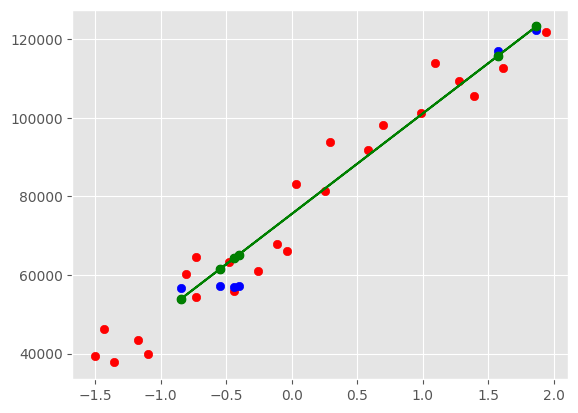

In [88]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, c='red')
plt.scatter(X_test, y_test, c='blue')
plt.plot(X_test, (np.dot(X_test.reshape((X_test.shape[0],1)),model1.w_)+model1.b_), c='g',marker='o')
plt.scatter(X_test, predictions.reshape(X_test.shape[0]), c='black')
plt.show()

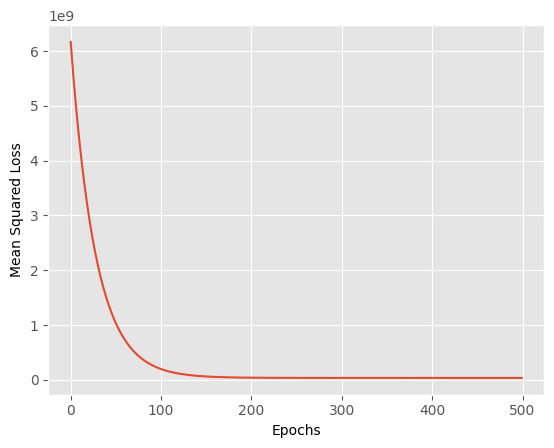

In [89]:
model1.plot_loss_with_epochs()

In [90]:
model1.parameter_values()

W0: 25580.069574767844
b:  75527.28689871174
